### Fill in group number and member names:

In [1]:
GROUP = "7"
NAME1 = "Ali Bakly"
NAME2 = "NA"

%load_ext autoreload
%autoreload 2

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the fixed-point residual $\norm{x^{k+1} - x^k}_{2}$ (also known as the step-length), of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use __figures__ and __tables__ to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook. (One way to do this is to print the notebook in your web browser, and then save as pdf.)

This table shows which lectures are needed in order to solve task 1-7:
    
| Task | Lectures |
| ---- | -------- |
| 1    | 2, 3     |
| 2    | 4        |
| 3    | 3, 4     |
| 4    | 2, 4     |
| 5    | 3, 4     |
| 6    | 5        |
| 7    | 4        |

Task 8-10 can be solved after you have solved task 1-7. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__ 

Let us first show that $f$ is convex. We remind ourselves about the second order condition for convexity:
* $f$ is convex $\iff \nabla^2 f(x) \succeq 0 \quad \forall x \in \mathbb{R}^n,$ i.e the hessian of $f$ is semi-positive definite.
  
Recall that
$$f(x) = \frac{1}{2}x^T Q x + q^Tx \implies \nabla f(x) = Qx+q \implies \nabla^2 f(x) = Q.$$
By assumption $Q\in\mathbb{S}_{++}^{n}$ so $\nabla^2 f(x) \succ 0$, fullfilling the second order condition for convexity.

Now let us show that $\iota_{S}$ is convex. As seen in class $\iota_{S} \;\; \text{convex} \iff S \;\; \text{convex}$, so it suffices to show that $S$ is convex. Take any $x,y \in S$ and $\theta \in [0,1]$. Then we must show that $a \leq \theta x + (\theta -1 )y \leq b$. Since $a \leq x \leq b$ and $a \leq y \leq b$ we have 
\begin{align*}
\theta a + (1- \theta)&a \leq \theta x + (1- \theta)y \leq \theta b + (1- \theta)b \\
&\;\;\;\;\;\;\;\; \iff \\
&a \leq \theta x + (1 - \theta)y \leq b,
\end{align*}and thus we have $\theta x + (\theta -1 )y \in S$.

Finally let us show that the constraint qualification (CQ) holds, i.e that $$\relint{\dom f} \cap \relint{\dom g} \neq \emptyset$$ Note that $f$ is a quadratic function defined everywhere in $\mathbb{R}^n$, therefore its domain is $\mathbb{R}^n$. Since $\text{dom}(f) = \mathbb{R}^n$, its relative interior is $\relint{\dom f} = \relint{\mathbb{R}^n} = \mathbb{R}^n$. The domain of $g = \iota_{S}(x)$ (i.e., where $g$ is finite) is $S$, thus $\relint{\dom g} = \relint{S} \subset \mathbb{R}^n$. Therefor we have $$\relint{\dom f} \cap \relint{\dom g} = \mathbb{R}^n \cap \relint{S} = \relint{S} \neq \emptyset,$$ where $\relint{S} \neq \emptyset$ by assumption.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

Let us start with $f^\ast$. The gradient satisfies $\nabla f(x) = Qx + q$

Recall that $$f^*(s) = \sup_{x \in \mathbb{R}^n} \left( s^T x - \frac{1}{2} x^T Q x - q^T x \right),$$ and let $h(x) = s^T x - \frac{1}{2} x^T Q x - q^T x$. Fermat's rule for $f^*(s)$ yields:

\begin{align}
0 = s - Qx - q \quad \iff \quad x = Q^{-1}(s - q),
\end{align}

since clearly $Q$ is invertible, due to positive definiteness. Note that in general one would have $0 \in \partial h(x)$, but since $h(x)$ is differetiable with $\nabla h(x)= s - Qx - q$ we have $\partial h(x)= \{\nabla h(x)\} = \{s - Qx - q\}$. Since this is a singleton set we have equality. Finally by substituting,

\begin{align}
f^*(s) &= s^T Q^{-1}(s - q) - \frac{1}{2} (s - q)^T Q^{-1} Q Q^{-1} (s - q) - q^T Q^{-1}(s - q) \\
&= \frac{1}{2}(s - q)^T Q^{-1}(s - q).
\end{align}

Let us now treat $\iota_{S}^\ast$. Again, $$\iota_{S}^\ast(s) = \sup_{x \in \mathbb{R}^n} \left( s^T x - \iota_{S}(x) \right).$$ Note that for $x \in \mathbb{R}\smallsetminus S$ results on $\iota_{S}(x) = \infty$ and $s^T x - \iota_{S}(x) = -\infty$. This means that the supremum is never attained at $x \in \mathbb{R}\smallsetminus S$, letting us write: $$\iota_{S}^\ast(s) = \sup_{x \in S} \left( s^T x - \iota_{S}(x) \right).$$ But, if $x \in S$ then $\iota_{S}(x) = 0$ and $$\iota_{S}^\ast(s) = \sup_{x \in S} \left( s^T x \right)= \sup_{(x_1,\ldots, x_n) \in S} \left(\sum_{i=1}^n s_ix_i\right) = \sum_{i=1}^n \sup_{a_i \leq x_i \leq b_i}s_ix_i.$$ It is also simple to see that $$\sup_{a_i \leq x_i \leq b_i}s_ix_i = 
\begin{cases} 
s_i a_i & \text{if } s_i \geq 0, \\
s_i b_i & \text{if } s_i < 0.
\end{cases}$$
Finally, we have: $$\iota_{S}^\ast(s)=\sum_{i=1}^{n}\begin{cases} 
s_i a_i & \text{if } s_i \geq 0, \\
s_i b_i & \text{if } s_i < 0.
\end{cases}$$


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

We are considering the primal problem
$$\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(Lx),$$ with $L = I$ (the identity). Letting $\mu \in \partial\iota_{S}(Lx)$, the dual problem is 
$$\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(-L\mu) + \iota^\ast_{S}(\mu) = \underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(-\mu) + \iota^\ast_{S}(\mu) .$$ 
To check the constraint qualification we should verify the following:
$$ \relint{\dom f^\ast \circ -I} \cap \relint{\dom  \iota^\ast_{S}} \neq \emptyset.$$
This clearly holds since 
$$\relint{\dom f^\ast \circ -I} = \relint{\dom f^\ast} =  \relint{\mathbb{R^n}} = \mathbb{R^n},$$
and  
$$\relint{\dom  \iota^\ast_{S}}=\relint{\mathbb{R}^n}= \mathbb{R}^n,$$
which certainly leads to
$$ \relint{\dom f^\ast \circ -I} \cap \relint{\dom  \iota^\ast_{S}} \neq \emptyset$$.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

For $f$ we know that $f$ is $\beta$-smooth if and only if
$$0\preceq\nabla^2 f(x) \preceq\beta I,$$
using that $f$ is convex (otherwise we need to replace $0$ with $-\beta I$). This means that we should show that $\beta I$ minus the hessian $\nabla^2 f(x) = Q$  is positive semi-definite. Note that $0\preceq\nabla^2 f(x)$ is true by assumption of $Q\in\mathbb{S}_{++}$. Now, let the eigenvalue(s) of $Q$ be denoted by $\lambda$, i.e $Qx = \lambda x$. Note that $(\beta I - Q)^\top = \beta I^\top - Q^\top = \beta I - Q$, meaning that  $(\beta I - Q)$ is symmetric (and hermitian). Recall that a hermitian matrix is positive semi-definiten if and only if all of its eigenvalues are non-negative. Consider the following:
$$
(\beta I - Q)x = \beta x - Qx = \beta x - \lambda x = (\beta - \lambda)x,
$$
which implies that $\beta I - Q$ has the eigenvalue(s) $\beta - \lambda$. For positive semi-definiteness we therefore need $\beta - \lambda_i \geq 0 \iff \beta \geq \lambda_i$ for all eigenvalues $\lambda_i$. The smallest $\beta$ such that this is upheld is 
$$\beta = \underset{i}{\text{max}}\; \lambda_i = \lambda_{\text{max}}$$

For $f^\ast$ we can do the corresponding analysis but with $\nabla^2 f(x) = Q^{-1}$, and show $$0\preceq Q^{-1} \preceq\beta^\ast I.$$ First we consider $0\preceq Q^{-1}.$ Since $(Q^{-1})^\top = (Q^\top)^{-1} = Q^{-1}$, $Q^{-1}$ is symmetric and if $Q$ has eigenvalue $\lambda>0$ then $Q^{-1}$ has the eigenvalue $1/\lambda > 0$, which implies $Q^{-1}$ is positive definite and therefore also positive semi definite. Now, lets consider $Q^{-1} \preceq\beta^\ast I$. The same analysis as before would lead to $\beta^\ast \geq 1/\lambda_i$ for all eigenvalues $\lambda_i$. The smallest $\beta^\ast$ such that this is upheld is $$\beta^\ast = \underset{i}{\text{max}}\; 1/\lambda_i = 1/\lambda_{\text{min}}$$

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__ 
The gradients are given as the folllowing:
$$f(x)=\frac{1}{2}x^TQx+q^Tx \implies \nabla f(x)=Qx+q$$
$$f^\ast(s)=\frac{1}{2}(s-q)^TQ^{-1}(s-q) \implies \nabla f^\ast (s)=Q^{-1}(s-q)$$

For $\prox_{\gamma\iota_{S}}$ we use the definition:

$$\prox_{\gamma\iota_{S}}(z) = \argmin_{x \in \mathbb{R}^n} \left( \frac{1}{2\gamma} \| x - z \|_2^2 + \iota_S(x) \right)= \argmin_{x \in S} \left( \frac{1}{2\gamma} \| x - z \|_2^2 \right) = \argmin_{x \in S} \left( \| x - z \|_2 \right). $$
Note that this is precisely the projection of the point $z$ into the set $S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.$ To minimize $\| x - z \|_2$ one need to choose $x$ such that each element $|x_i-z_i|$ is as small as possible. This is accomplished with
$$x_i =
\begin{cases} 
a_i & \text{if } z_i < a_i, \\
z_i & \text{if } a_i \leq z_i \leq b_i,\\
b_i & \text{if } z_i > b_i,
\end{cases}
$$
and $ \prox_{\gamma\iota_{S}}(z) = [x_1,..., x_n]^\top$, where each $x_i$ are selected as above. One could also have utilized Fermats rule to reach this result.

Since $\iota_{S}$ is closed convex as previously shown we can for $\prox_{\gamma\iota_{S}^\ast}$ use the Moreau decomposition:
$$
z = \prox_{\gamma\iota_{S}}(z)+\prox_{(\gamma \iota_{S})^\ast}(z)=\prox_{\gamma \iota_{S}}(z)+\gamma\prox_{\gamma^{-1}\iota_{S}^\ast}(\gamma^{-1}z),
$$
but instead of using $\iota_{S}$ in the decomposition above we use $\iota_{S}^\ast$:
$$
z = \prox_{\gamma\iota_{S}^\ast}(z)+\prox_{(\gamma \iota_{S}^\ast)^\ast}(z)=\prox_{\gamma \iota_{S}^\ast}(z)+\gamma\prox_{\gamma^{-1}\iota_{S}^{\ast \ast}}(\gamma^{-1}z) = \prox_{\gamma \iota_{S}^\ast}(z)+\gamma\prox_{\gamma^{-1}\iota_{S}}(\gamma^{-1}z),
$$
where we in the last equality used the fact that $\iota_{S} = \iota_{S}^{\ast \ast}$ (implied by closed an convex). Meaning we have
$$
\prox_{\gamma \iota_{S}^\ast}(z) = z - \gamma\prox_{\gamma^{-1}\iota_{S}}(\gamma^{-1}z).
$$
Thus, 
$$
\prox_{\gamma \iota_{S}^\ast}(z) = [x_1,..., x_n]^\top,
$$
where $x_i$ is now instead given by
$$
x_i=\begin{cases} 
z_i-\gamma a_i & \text{if } \gamma^{-1}z_i < a_i, \\
0 & \text{if } a_i \leq \gamma^{-1}z_i \leq b_i,\\
z_i - \gamma b_i & \text{if } \gamma^{-1}z_i > b_i.
\end{cases}
$$

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

We recall that for problems of the form
\begin{align*}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x), 
\end{align*}

The proximal gradient update (with constant step-size) is given by:

\begin{align*}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align*}
In our case we have $g = \iota_S$ and $ \nabla f(x^k) =Qx^k + q$, meaning
\begin{align*}
				x^{k+1} = \prox_{\gamma \iota_S}\left(x^k - \gamma (Qx^k + q)\right).
\end{align*}
Letting $v^k = x^k - \gamma (Qx^k + q)$, we have
\begin{align*}
				x^{k+1} = \prox_{\gamma \iota_S}\left(v^k\right).
\end{align*}
We know from the previous task that 
$$ x^{k+1} = \prox_{\gamma\iota_{S}}(v^k) = [x_1^k,..., x_n^k]^\top
$$ 
where
$$x_i^k =
\begin{cases} 
a_i & \text{if } v_i^k < a_i, \\
v_i^k & \text{if } a_i \leq v_i^k \leq b_i,\\
b_i & \text{if } v_i^k > b_i.
\end{cases}
$$

**The dual problem** looks like
$$
\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(-\mu) + \iota^\ast_{S}(\mu)
$$
implying that the proximal gradient update becomes
$$
    \mu^{k+1} = \prox_{\gamma \iota^\ast_S}\left(\mu^k - \gamma \nabla (f^\ast\circ-I)(\mu^k)\right) = \prox_{\gamma \iota^\ast_S}\left(\mu^k + \gamma \left(Q^{-1}\left(-\mu^k-q\right)\right)\right) =  \prox_{\gamma \iota^\ast_S}\left( \mu^k - \gamma \left(Q^{-1}\left(\mu^k+q\right)\right)\right).
$$
Similarly, we can let  $u^k =\mu^k - \gamma \left(Q^{-1}\left(\mu^k+q\right)\right)$ leading to
$$
\mu^{k+1} = \prox_{\gamma \iota^\ast_S}\left(u^k\right),
$$
and again from the previous task we know 
$$
\mu^{k+1} = \prox_{\gamma \iota^\ast_S}\left(u^k\right) = [x_1^k,..., x_n^k]^\top,
$$
where $x_i$ is now instead given by
$$
x_i^k=\begin{cases} 
u_i^k-\gamma a_i & \text{if } \gamma^{-1}u_i^k < a_i, \\
0 & \text{if } a_i \leq \gamma^{-1}u_i^k \leq b_i,\\
u_i^k - \gamma b_i & \text{if } \gamma^{-1}u_i^k > b_i.
\end{cases}
$$

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and __starting from the optimality condition for the dual problem (given by _Fermat's rule_)__, recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2). 

__Solution:__ 

Our dual problem is
$$
\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(-L^T\mu) + \iota^\ast_{S}(\mu),
$$
where $L = I$. D-CQ holds and $f^*, \iota_S^*$ are closed, convex and proper implying that in this case the dual optimality condition is given by:
$$
0 \in -L\partial f^\ast(-L^T\mu^\ast) + \partial \iota^\ast_{S}(\mu^\ast) = -\partial f^\ast(-\mu^\ast) + \partial \iota^\ast_{S}(\mu^\ast).
$$
This implies that there exists some $x^\ast$ such that
$$
\begin{cases}
x^\ast \in \partial f^\ast(-\mu^\ast),\\
x^\ast\in\partial\iota_{S}^\ast(\mu^\ast),
\end {cases}
\iff
\begin {cases}
-\mu^\ast\in\partial f(x^\ast),\\
\mu^\ast\in\partial\iota_{S}(x^\ast).
\end {cases}
$$
In the equivalence we used the fact that for a function $h$ that is closed convex (both $f$ and $\iota_{S}$ are closed convex) we have the inverse relation
$$
s \in  \partial h(x) \iff x\in \partial h^\ast(s).
$$
Therefore we also have 
$$
-\mu^\ast + \mu^\ast \in \partial f(x^\ast) + \partial\iota_{S}(x^\ast) \iff 0 \in \partial f(x^\ast) + \partial\iota_{S}(x^\ast),
$$
which implies that $x^\ast$ is indeed an optimal solution, per Fermats rule. We can also retrieve the optimal solution, since $x^\ast$ must satisfy 
$$
x^\ast \in \partial f^\ast(- \mu^\ast)=  \{\nabla f^\ast(-\mu^\ast)\} = \{Q^{-1}(-\mu^\ast-q)\},
$$
since $f^\ast$ is differentiable, and because this is a signleton set we have
$$
x^\ast = Q^{-1}(-\mu^\ast-q).
$$



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task 8:

Use your results above to fill in the functions below.

__Solution:__ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    # Write your solution here
    return 0.5 * x.T @ Q @ x + q.T @ x

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    return 0.5 * (mu - q).T @ np.linalg.inv(Q) @ (mu - q)

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    # Faster and nicer than loops!:
    terms  = np.where(mu >= 0, mu * a, mu * b)
    return sum(terms)

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    # Write your solution here
    return Q @ x + q

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    return np.linalg.inv(Q) @ (mu - q)

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box contraint [a,b], evaluated at x
    
    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box contraint [a,b], evaluated at x
    """
    # Write your solution here
    # this is equivalent with
    # a_i if      z_i<a_i,
    # z_i if a_i<=z_i<=b_i,
    # b_i if      z_i>b_i
    # But this is nicer and probably much faster (vectorized) than loops!:
    return np.minimum(np.maximum(x, a), b) 
    
def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    # Could do the same as in prox_box, but no need since we already implemented it!
    return mu - gamma * prox_box(mu / gamma, a, b, None)

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """
    # Write your solution here
    return - np.linalg.inv(Q) @ (mu + q)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

In [4]:
def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

(Q,q,a,b) = problem_data()

__a)__ What seems to be the best choice of $\gamma$? 

__Solution:__ 
Below, we implement the proximal gradient algorithm for the primal problem and plot the 2-norm of the residuals. The best choice of $\gamma$ depends on whether fast convergence is the priority or if a more stable, robust but slower convergence is preferred. We observe that $2/\beta$ seems to be the largest step size that guarantees convergence and offers the fastest results. Therefore, if speed is the most important criterion, $\gamma = 2/\beta$ is a candidate for the optimal step size. However, for example, a step size of $\frac{2}{\beta} - 0.015$ results in a significantly smoother but slower convergence.

In [5]:
# Write your solution here
def beta(A): 
    return np.max(np.linalg.eigvals(A))

def prox_grad_primal(x_0, Q, q, a, b, gamma, nbr_steps):
    x_current = x_0
    residuals = np.zeros(nbr_steps)
    x_trajectory = []
    
    for i in range(nbr_steps):
        x_trajectory.append(x_current)
        x_next = prox_box(x_current - gamma*(Q @ x_current + q), a, b, gamma)
        residuals[i] = np.linalg.norm(x_next - x_current)        
        x_current = x_next

    x_optimal = x_current
    return x_optimal, residuals, x_trajectory

def plot_residuals_all_gammas(residuals_list, gammas):
    plt.figure(figsize=(8, 5))
    
    # Create x-axis values (iteration numbers)
    x = range(len(residuals_list[0]))
    
    # Plot all residuals for different gammas in one plot
    for residuals, gamma in zip(residuals_list, gammas):
        gamma_diff = gamma - gamma_beta
        legend_label = r'$\frac{{2}}{{\beta}} {:+.3f}$'.format(gamma_diff)
        plt.semilogy(x, residuals, label=legend_label)
    
    plt.title('Convergence for Different Gamma Values')
    plt.xlabel('Iteration')
    plt.ylabel('2-Norm of Residual (log scale)')
    plt.grid(True)
    plt.legend()  # Show legend to distinguish between different gamma values
    
    plt.tight_layout()
    plt.show()


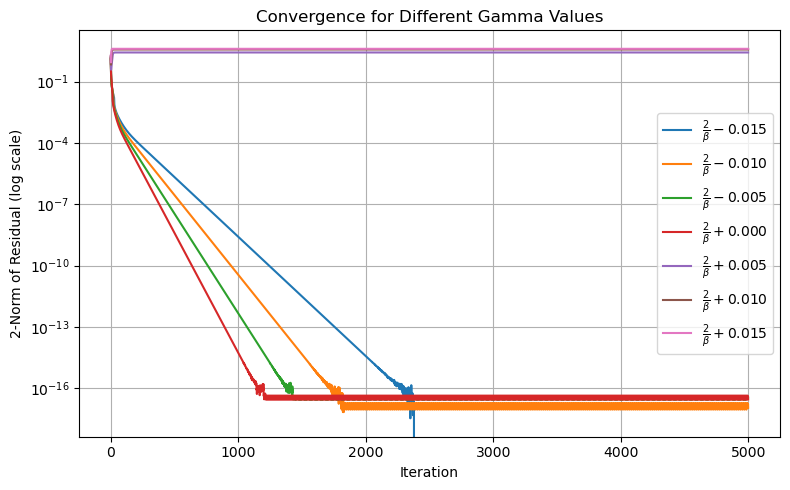

In [6]:
x_0 = np.random.rand(20)
gamma_beta = 2 / beta(Q)
gammas = [gamma_beta - 0.015, gamma_beta - 0.01, gamma_beta - 0.005, gamma_beta, gamma_beta + 0.005, gamma_beta + 0.01, gamma_beta + 0.015]

# Collect all residuals for different gamma values
residuals_list = []

for gamma in gammas:
    _, residuals, _ = prox_grad_primal(x_0, Q, q, a, b, gamma, 5000)
    residuals_list.append(residuals)

# Plot all residuals in the same figure
plot_residuals_all_gammas(residuals_list, gammas)
    

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?

__Solution:__ 

Yes, as shown in the plots above, it converges for these $\gamma$ and for values  of $\gamma$ above this it does not converge.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? 

__Solution:__ 

Below we generate 10 quite different starting points and calculate distance between each generated optimum (2 norm of difference). We find that they differe most by a number with magnitude of $10^{-15}$, therefore it is safe to say that the algorithm does seem to converge to the same point

In [7]:
x_0_vec = [i*np.random.rand(20) for i in range(-50, 50, 10)]
gamma = 2 / beta(Q)
x_optimal_vec = [prox_grad_primal(x_0, Q, q, a, b, gamma, 5000)[0] for x_0 in x_0_vec]

max = 0

for i in range(len(x_optimal_vec)):
    for j in range(i+1, len(x_optimal_vec)):
        norm_difference = np.linalg.norm(x_optimal_vec[j] - x_optimal_vec[i])
        if norm_difference > max:
            max = norm_difference

print(f"The optimal points differ in 2-norm sense by a maximum amount of {max:.2e}.")

The optimal points differ in 2-norm sense by a maximum amount of 3.07e-15.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Carefully motivate theoretically why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__Solution:__ 

The objective function is given as
\begin{align}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x),
\end{align}
and we have shown that $f(x)$ is strongly convex (pos.def Hessian) and that $\iota_{S}(x)$ is convex since $S$ is a convex set. The theory from the lectures states that the sum of strongly convex and convex functions is strongly convex, therefore our objective function is strongly convex. From the theory we also know that strongly convex functions have a unique global minimum which explains why different starting points do not affect the result.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__Solution:__ 

It does, we try this for optimal values with different starting points as seen in the code below.

In [8]:
x_0_vec = [i*np.random.rand(20) for i in range(-50, 50, 10)]
gamma = 2 / beta(Q)
x_optimal_vec = [prox_grad_primal(x_0, Q, q, a, b, gamma, 5000)[0] for x_0 in x_0_vec]
constraint_satisfied = True

for x_optimal in x_optimal_vec:
    if box(x_optimal,a,b) != 0:
        print("All optimal values do not satisfy the constraint")
        constraint_satisfied = False
        break
        
if constraint_satisfied:
    print("All optimal values satisfy the constraint")


All optimal values satisfy the constraint


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__ 

Let's do this for one gamma and one staring point in the code below. We see that the constrain is satisfied for all iterates (excluding $x_0$). This can be explained wit what we showed in task 5:
$$
\prox_{\gamma\iota_{S}}(z) = \argmin_{x \in S} \left( \| x - z \|_2 \right),
$$
which means that $\prox_{\gamma\iota_{S}}(z)$  projects $z$ onto $S$. So in the proximal gradient we always project onto $S$ implying that all the iterates will satisfy the box constraint.

In [9]:
x_0_vec = np.random.rand(20)
gamma = 2 / beta(Q)
_, _, x_trajectory = prox_grad_primal(x_0, Q, q, a, b, gamma, 5000)
constraint_satisfied = True

for x in x_trajectory[1:]: # not including x_0 of course!
    if box(x,a,b) != 0:
        print("All optimal values do not satisfy the constraint")
        constraint_satisfied = False
        break
    
if constraint_satisfied:
    print("All optimal values satisfy the constraint")

All optimal values satisfy the constraint


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

__Solution:__ 

_Fill in your solution here!_

In [10]:
# Write your solution here
def beta_star(A):
     return 1/np.min(np.linalg.eigvals(A)) 

def prox_grad_dual(m_0, Q, q, a, b, gamma, nbr_steps):
    mu_current = mu_0
    residuals = np.zeros(nbr_steps)
    mu_trajectory = []
    
    for i in range(nbr_steps):
        mu_trajectory.append(mu_current)
        mu_next = prox_boxconj(mu_current - gamma*(np.linalg.inv(Q) @ ( mu_current + q)), a, b, gamma)
        residuals[i] = np.linalg.norm(mu_next - mu_current)        
        mu_current = mu_next

    mu_optimal = mu_current
    return mu_optimal, residuals, mu_trajectory

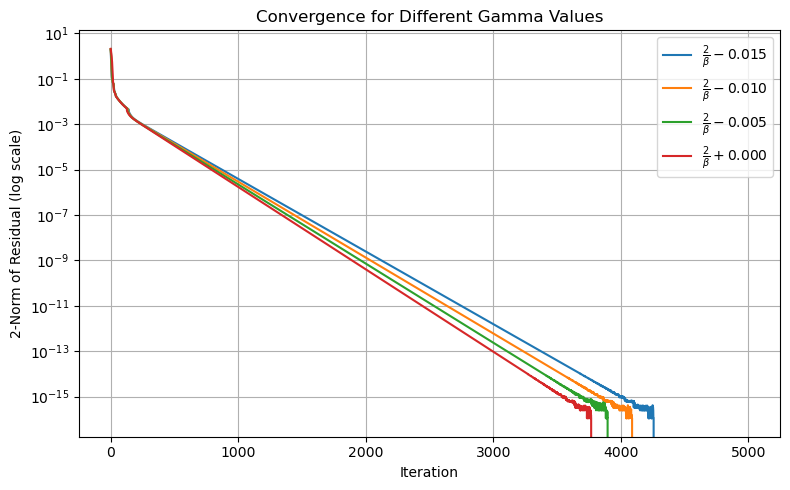

In [11]:
mu_0 = np.random.rand(20)
gamma_beta = 2 / beta_star(Q)
gammas = [gamma_beta - 0.015, gamma_beta - 0.01, gamma_beta - 0.005, gamma_beta]

# Collect all residuals for different gamma values
residuals_list = []

for gamma in gammas:
    _, residuals, _ = prox_grad_dual(mu_0, Q, q, a, b, gamma, 5000)
    residuals_list.append(residuals)

# Plot all residuals in the same figure
plot_residuals_all_gammas(residuals_list, gammas)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__Solution:__ 

They are indeed the same as seen below iin the calculations.

In [12]:
mu_0 = np.random.rand(20)
x_0 = np.random.rand(20)
gamma_beta_star = 2 / beta_star(Q)
gamma_beta = 2 / beta(Q)

mu_optimal, _, mu_trajectory = prox_grad_dual(mu_0, Q, q, a, b, gamma_beta_star, 5000)
x_optimal_hat = dual_to_primal(mu_optimal,Q,q,a,b)

x_optimal, _, _ = prox_grad_primal(x_0, Q, q, a, b, gamma_beta, 5000)
print(f"Optimal point by solveing the primal problem: \n {x_optimal}\n")
print(f"Optimal point by solveing the dual problem: \n {x_optimal_hat}\n")

print(f"Distance between the points in 2-norm sence: {np.linalg.norm(x_optimal-x_optimal_hat)}")


Optimal point by solveing the primal problem: 
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]

Optimal point by solveing the dual problem: 
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]

Distance between the points in 2-norm sence: 2.452125976626626e-15


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__Solution:__ 

No, it does not, as can be seen below.

In [13]:
if box(x_optimal_hat,a,b) != 0:
    print("The optimal values does not satisfy the constraint")
    constraint_satisfied = False
else:
    print("The optimal values does satisfy the constraint")

The optimal values does not satisfy the constraint


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

__Solution:__ 

As seen below in the plot $\hat{x}^k \notin S$ for all $k$, since for each timestep k the plot has value 0 (false).

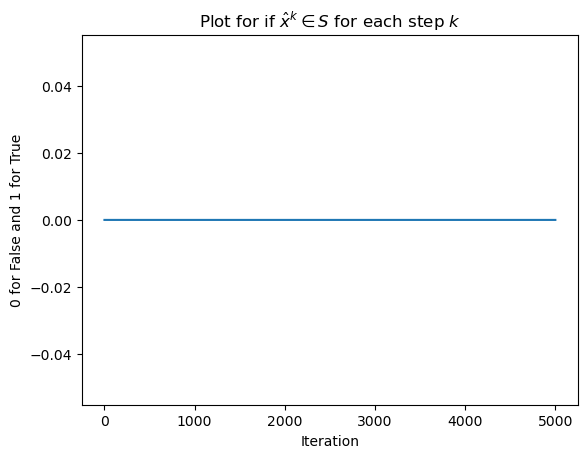

In [14]:
x_hat_in_S = np.full(len(mu_trajectory), True)
x_hat_traject = []  # need this for e)
for i in range(len(mu_trajectory)):
    x_hat = dual_to_primal(mu_trajectory[i],Q,q,a,b)
    x_hat_traject.append(x_hat)
    if box(x_hat,a,b) != 0:
        x_hat_in_S[i] = False

plt.plot(x_hat_in_S)
plt.xlabel('Iteration')
plt.ylabel('0 for False and 1 for True')
plt.title('Plot for if $\hat{x}^k \in S$ for each step $k$')
plt.show()

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__Solution:__ 

See the plot below. The value of the function fluctuates in the beginning but converges after a few hundred iterations

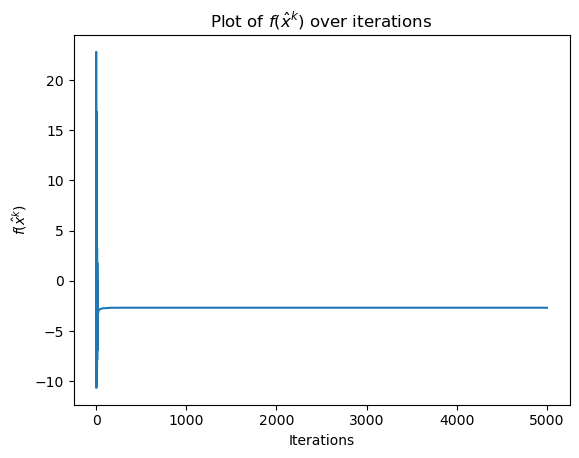

In [15]:
f_x_hat = np.array([quad(x_hat,Q,q) for x_hat in x_hat_traject])
plt.plot(f_x_hat)
plt.xlabel('Iterations')
plt.ylabel('$f(\hat{x}^k )$')
plt.title('Plot of $f(\hat{x}^k)$ over iterations')
plt.show()

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__ 

It is infinity everywhere since since $\hat{x}^k \notin S $ for all k, thus there is no point in plotting it